In [2]:
import numpy as np
import os  # OS library can be used for reading folders,sub-folders or files inside a directory.
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm  # Can be used as a progress tracker

In [3]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

print (class_names_label)

number_of_classes = len(class_names)

IMAGE_SIZE = (150, 150)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [10]:
def load_data():
    
#    datasets = ['../Data/seg_train/seg_train', '../Data/seg_test/seg_test']
    datasets = ['E:/Artificial Intelligence/seg_train/seg_train', 'E:/Artificial Intelligence/seg_test/seg_test']
    output = []
    
    #Iterating through Train & Test Data Set.
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading Started for ",dataset)
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):   # 6 times for each folder
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            # Example Path: ../Data/seg_train/seg_train/buildings
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [11]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|▎                                                                                | 7/2191 [00:00<00:33, 65.84it/s]

Loading Started for  E:/Artificial Intelligence/seg_train/seg_train


100%|██████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:39<00:00, 60.09it/s]


Loading Started for  E:/Artificial Intelligence/seg_test/seg_test


100%|████████████████████████████████████████████████████████████████████████████████| 501/501 [00:09<00:00, 53.17it/s]


In [12]:
print (train_labels.shape)
print (test_labels.shape)
print (train_labels)

(14034,)
(3000,)
[3 3 3 ... 1 1 1]


In [13]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [14]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

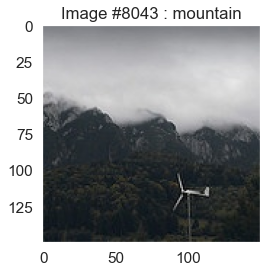

In [15]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[train_labels[index]])
plt.show()

In [16]:
model_scratch = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model_scratch.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [17]:
model_scratch.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model_scratch.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.15)

Epoch 1/20
94/94 [==============================] - 316s 3s/step - loss: 1.1383 - accuracy: 0.5586 - val_loss: 0.8964 - val_accuracy: 0.6510
Epoch 2/20
94/94 [==============================] - 310s 3s/step - loss: 0.7629 - accuracy: 0.7181 - val_loss: 0.6943 - val_accuracy: 0.7365
Epoch 3/20
94/94 [==============================] - 303s 3s/step - loss: 0.5733 - accuracy: 0.7900 - val_loss: 0.6484 - val_accuracy: 0.7669
Epoch 4/20
94/94 [==============================] - 311s 3s/step - loss: 0.4455 - accuracy: 0.8421 - val_loss: 0.5630 - val_accuracy: 0.7944
Epoch 5/20
94/94 [==============================] - 305s 3s/step - loss: 0.3188 - accuracy: 0.8887 - val_loss: 0.5772 - val_accuracy: 0.7968
Epoch 6/20
94/94 [==============================] - 296s 3s/step - loss: 0.2483 - accuracy: 0.9153 - val_loss: 0.6300 - val_accuracy: 0.7925
Epoch 7/20
94/94 [==============================] - 302s 3s/step - loss: 0.1563 - accuracy: 0.9493 - val_loss: 0.7243 - val_accuracy: 0.7982
Epoch 8/20
94

In [19]:
for layer in model_scratch.layers:
    print (layer.get_weights())

[array([[[[ 3.53948623e-02,  1.20481074e-01, -3.97130474e-02,
           4.26396765e-02, -3.76908444e-02,  1.09215342e-02,
           1.29279032e-01,  7.79808015e-02, -1.47860227e-02,
           8.34859759e-02, -3.44097018e-02, -9.60462391e-02,
           1.14537120e-01, -1.21960774e-01, -2.68790387e-02,
          -6.61261305e-02, -8.98378566e-02, -8.92249197e-02,
           3.97545546e-02, -8.22054520e-02,  5.92747070e-02,
           1.17771104e-01, -1.64401695e-01,  4.61176895e-02,
          -1.10836744e-01,  4.57092300e-02, -3.27906832e-02,
          -1.81315970e-02,  8.10956582e-02,  5.39718866e-02,
           2.36092024e-02, -1.21433534e-01],
         [ 5.28847910e-02, -1.01287374e-02,  5.65329380e-02,
          -1.32603616e-01,  3.95588093e-02,  1.29258186e-01,
          -1.28249079e-01,  1.15512222e-01,  1.12115704e-01,
          -4.07912862e-03, -6.35151416e-02, -2.26024799e-02,
          -1.04123093e-01,  1.36872187e-01,  1.87976602e-02,
           1.33897677e-01,  2.12779138e

In [20]:
test_loss = model_scratch.evaluate(test_images, test_labels)

94/94 [==============================] - 17s 184ms/step - loss: 1.3130 - accuracy: 0.7653


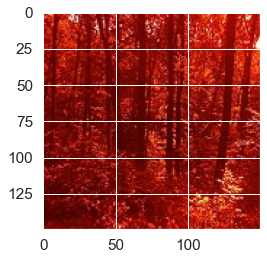

In [27]:
image = cv2.imread("E:\Artificial Intelligence\Data_Evaluation/Forest_1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE)
plt.imshow(image)

In [28]:
evaluate_image = [image]
                
images = np.array(evaluate_image, dtype = 'float32')

In [29]:
print (images.shape)

(1, 150, 150, 3)


In [30]:
model_scratch.predict(images)

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

In [31]:
# {'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}
pred_labels = np.argmax(model_scratch.predict(images), axis = 1)
print(pred_labels)

[5]


In [32]:
for class_name in class_names_label:
    if class_names_label[class_name] == pred_labels:
        print (class_name)

forest


In [33]:
predictions = model_scratch.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)

[[418   5  46  25  24   7]
 [  4 398   3  61   6  29]
 [117  11 364  21  35   5]
 [  5  86   7 319   7  13]
 [ 71  13  45  36 338   7]
 [  3   7   2   3   0 459]]


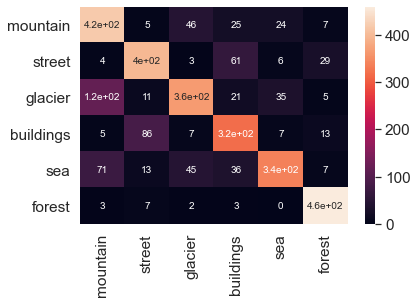

In [34]:
CM = confusion_matrix(test_labels, pred_labels)
print (CM)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
plt.show()

1991
[3 3 3 ... 1 1 1]


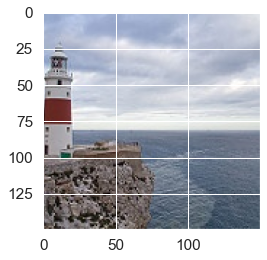


2004
[3 3 3 ... 1 1 1]


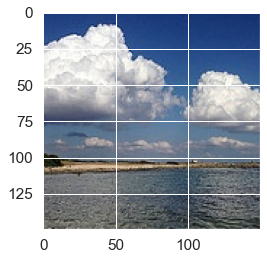


2008
[3 3 3 ... 1 1 1]


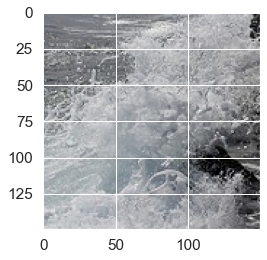


2014
[3 3 3 ... 1 1 1]


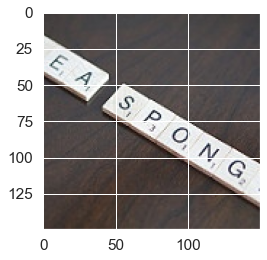


2016
[3 3 3 ... 1 1 1]


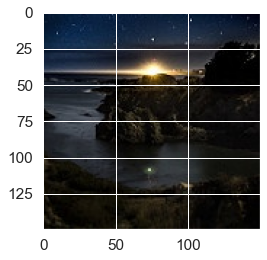

KeyboardInterrupt: Interrupted by user

In [35]:
# {'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}
for idx,image in enumerate(test_images):
    if (pred_labels[idx] == 2) and (test_labels[idx] == 4):
        print (idx)
        plt.imshow(test_images[idx])
        print (test_labels)
        plt.show()
        input()
    